In [1]:
!pip install pandas

In [4]:
import pandas as pd
try:
    df = pd.read_csv('/content/drive/MyDrive/Customer Segmentation for Loyalty Program/data.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 encoding failed, trying 'latin1'")
    df = pd.read_csv('/content/drive/MyDrive/Customer Segmentation for Loyalty Program/data.csv', encoding='latin1')
df

UTF-8 encoding failed, trying 'latin1'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
# ดูข้อมูลแต่ละคอลัมน์และประเภทข้อมูล
print(df.info())

# สถิติเชิงพรรณนาเบื้องต้น
print(df.describe())

# ตรวจสอบค่าที่หายไป (Missing Values)
print("🧹 Missing values ต่อคอลัมน์:")
print(df.isnull().sum())

# ตรวจสอบจำนวน unique ของแต่ละคอลัมน์
print("🔍 จำนวนค่าที่ไม่ซ้ำ:")
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [7]:
# 🔹 ลบ CustomerID ที่หาย
df = df.dropna(subset=['CustomerID'])

# 🔹 แปลง CustomerID ให้เป็น string (จะได้ไม่กลายเป็น 17850.0)
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

# 🔹 ลบใบยกเลิก: InvoiceNo ขึ้นต้นด้วย C
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 🔹 ลบ Quantity <= 0
df = df[df['Quantity'] > 0]

# 🔹 ลบ UnitPrice <= 0
df = df[df['UnitPrice'] > 0]

# 🔹 แปลง InvoiceDate เป็น datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# 🔹 เพิ่มคอลัมน์ TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [8]:
# ✅ ตรวจสอบผลลัพธ์
print("✅ ข้อมูลหลัง Clean แล้ว:")
print(df.info())
print(df.head())

✅ ข้อมูลหลัง Clean แล้ว:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84

In [9]:
import pandas as pd

# 🔹 กำหนดวันอ้างอิง (เช่น วันที่วิเคราะห์ล่าสุด + 1 วัน)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# ✅ สร้าง RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

# ✅ เปลี่ยนชื่อคอลัมน์
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# ✅ ดูผลลัพธ์
print("✅ RFM Table ตัวอย่าง:")
print(rfm.head())


✅ RFM Table ตัวอย่าง:
            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40


In [10]:
!pip install scikit-learn matplotlib seaborn

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


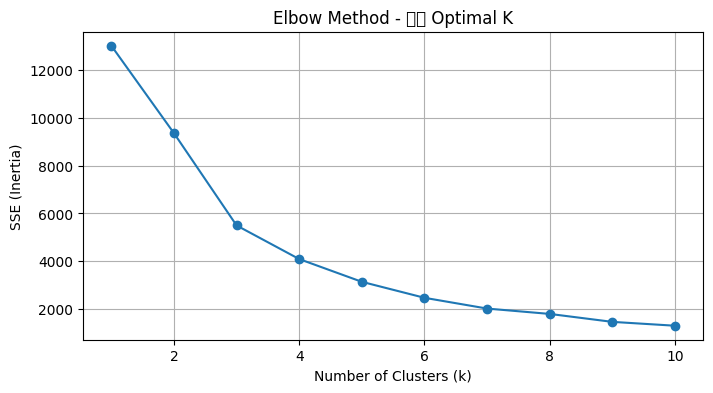

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- สมมุติว่าคุณมี RFM dataframe แล้ว (จากขั้นตอนก่อนหน้านี้)

# ✅ Step 1: เตรียมข้อมูล RFM สำหรับ clustering
rfm_clustering = rfm.copy()

# ✅ Step 2: สเกลข้อมูล (Standardization)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)

# ✅ Step 3: เลือกจำนวน Cluster ที่เหมาะสมด้วย Elbow Method
sse = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

# วาดกราฟ Elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - หา Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


In [12]:
# 🔹 สร้าง KMeans model ด้วย k ที่เลือก
k = 4  # หรือเปลี่ยนตามผล Elbow
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
rfm_clustering['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ✅ ดูผลลัพธ์
print(rfm_clustering.groupby('Cluster').mean().round(2))


         Recency  Frequency   Monetary
Cluster                               
0          43.70       3.68    1359.05
1         248.08       1.55     480.62
2           7.38      82.54  127338.31
3          15.50      22.33   12709.09


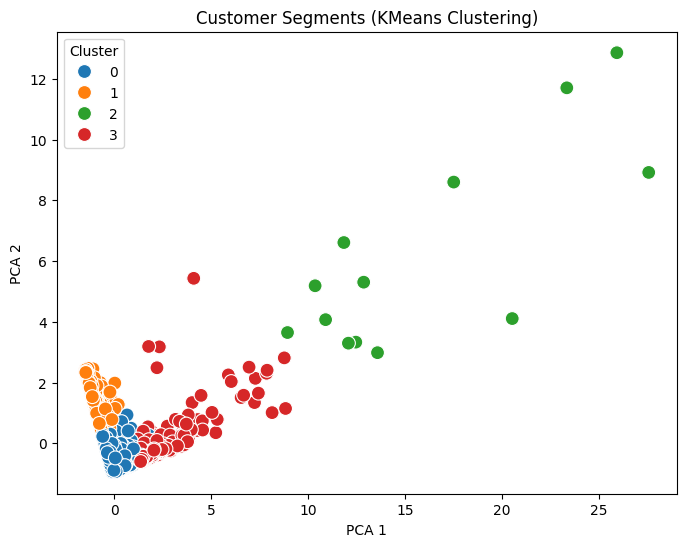

In [13]:
# ใช้ PCA ย่อลง 2 มิติ (optional เพื่อดูภาพรวม)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)

rfm_clustering['PCA1'] = components[:, 0]
rfm_clustering['PCA2'] = components[:, 1]

# 🔹 วาด scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_clustering, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


In [14]:
# ดูค่าเฉลี่ยของ R, F, M ในแต่ละกลุ่ม
rfm_summary = rfm_clustering.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print(rfm_summary)

         Recency  Frequency   Monetary
Cluster                               
0          43.70       3.68    1359.05
1         248.08       1.55     480.62
2           7.38      82.54  127338.31
3          15.50      22.33   12709.09


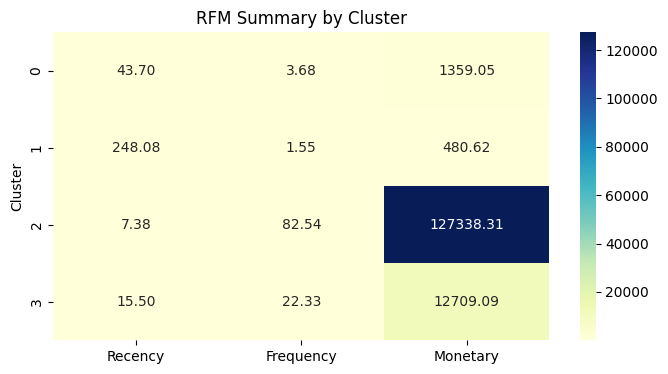

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(rfm_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("RFM Summary by Cluster")
plt.show()

# **แบ่งกลุ่มเพิ่ม**

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
rfm_clustering['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

# ดูผลลัพธ์
print(rfm_clustering['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    4297
-1      41
Name: count, dtype: int64


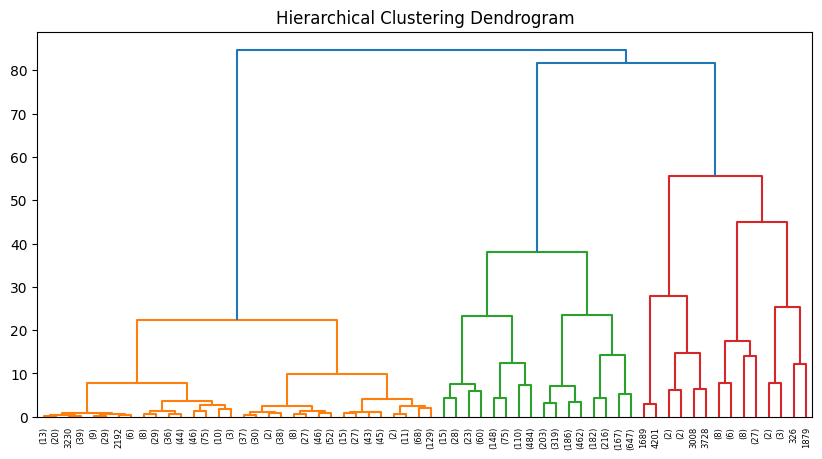

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# คำนวณ linkage matrix
linked = linkage(rfm_scaled, method='ward')

# วาด dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# ตัดแบ่งเป็นกลุ่ม (เช่น 4 กลุ่ม)
rfm_clustering['Hierarchical'] = fcluster(linked, t=4, criterion='maxclust')


In [ ]:
#ถ้าใช้ Google Colab เพิ่ม:
from google.colab import files
files.download("rfm_clusters.xlsx")

In [ ]:
rfm_clustering.to_csv("rfm_clusters.csv", index=True)